Installation of required libraries

In [1]:
# Install required packages
!pip install pytesseract
!pip install Pillow
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-tel

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,515 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-update

In [2]:
# import required libraries
import os
import time
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

Upload sample images

In [11]:
from google.colab import files
uploaded = files.upload()

# Create images directory if it doesn't exist
!mkdir -p images

# Move uploaded files to images directory
for filename in uploaded.keys():
    !mv "{filename}" "images/{filename}"

print("Uploaded files:", os.listdir('images'))

Saving WhatsApp Image 2024-12-10 at 05.29.26_3617fa99.jpg to WhatsApp Image 2024-12-10 at 05.29.26_3617fa99.jpg
Saving WhatsApp Image 2024-12-10 at 05.29.26_52649bab.jpg to WhatsApp Image 2024-12-10 at 05.29.26_52649bab.jpg
Saving WhatsApp Image 2024-12-10 at 05.29.27_50e6dc26.jpg to WhatsApp Image 2024-12-10 at 05.29.27_50e6dc26.jpg
Saving WhatsApp Image 2024-12-10 at 05.29.27_844a1232.jpg to WhatsApp Image 2024-12-10 at 05.29.27_844a1232.jpg
Saving WhatsApp Image 2024-12-10 at 05.29.27_d4978ea2.jpg to WhatsApp Image 2024-12-10 at 05.29.27_d4978ea2.jpg
Uploaded files: ['WhatsApp Image 2024-12-10 at 05.29.26_52649bab.jpg', 'sample_image.jpg', 'WhatsApp Image 2024-12-10 at 05.29.27_d4978ea2.jpg', 'WhatsApp Image 2024-12-10 at 05.29.26_3617fa99.jpg', 'WhatsApp Image 2024-12-10 at 05.29.27_844a1232.jpg', 'WhatsApp Image 2024-12-10 at 05.29.27_50e6dc26.jpg']


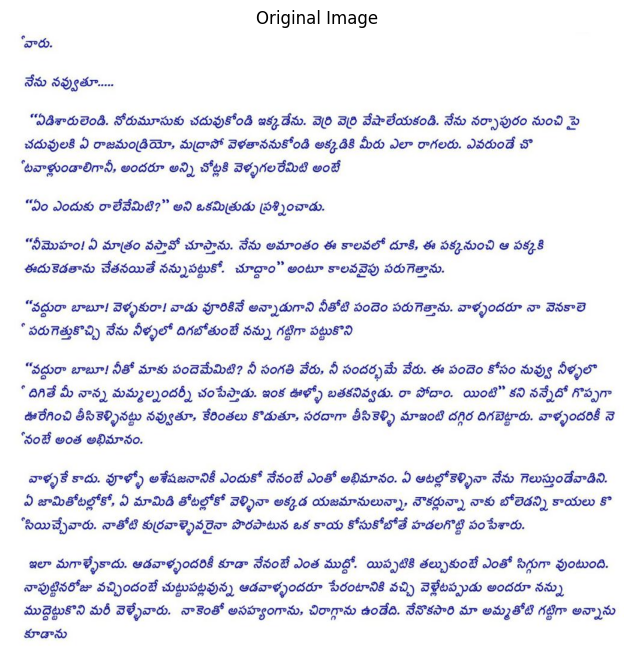

In [12]:
# Load a sample image
image_path = "images/" + os.listdir('images')[0]
original_image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(10, 8))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()


Preprocessing

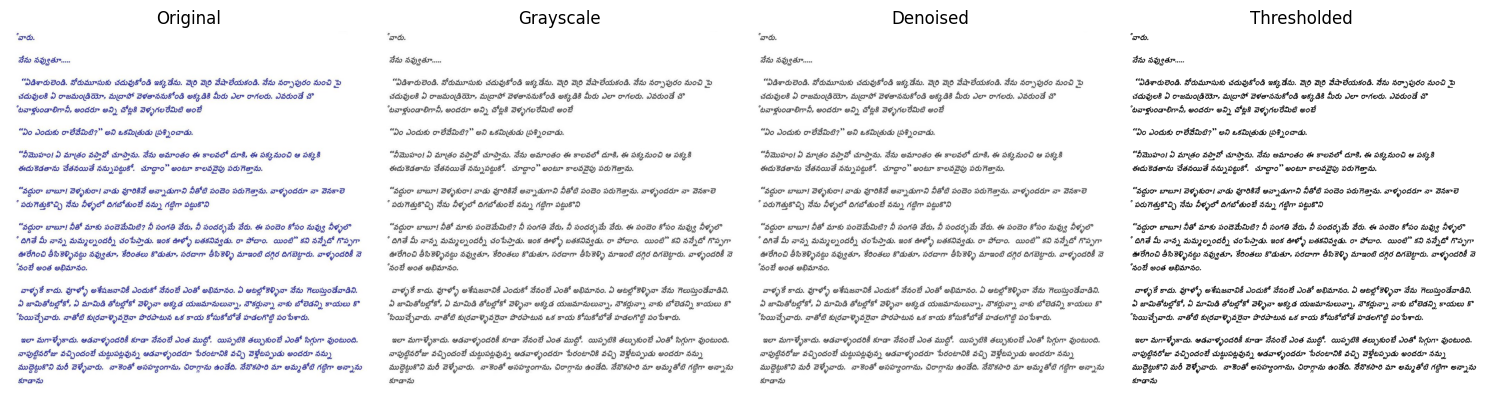

In [13]:
# Convert image to array for preprocessing
img = np.array(original_image)

# Grayscale conversion
if len(img.shape) == 3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = img

# Denoise
denoised_img = cv2.fastNlMeansDenoising(gray_img)

# Thresholding
threshold_img = cv2.threshold(denoised_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Display preprocessing steps
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(threshold_img, cmap='gray')
plt.title('Thresholded')
plt.axis('off')

plt.tight_layout()
plt.show()

Text extraction and confidence calculation

In [14]:
# Configure tesseract
custom_config = r'--oem 3 --psm 6 -l tel'

# Extract text and data
preprocessed_img = Image.fromarray(threshold_img)
data = pytesseract.image_to_data(preprocessed_img, config=custom_config, output_type=pytesseract.Output.DICT)
text = pytesseract.image_to_string(preprocessed_img, config=custom_config)

# Calculate confidence score
confidence_scores = [float(conf) for conf in data['conf'] if conf != '-1']
avg_confidence = np.mean(confidence_scores) if confidence_scores else 0

print("Extracted Text:")
print("-" * 50)
print(text)
print("\nConfidence Score:", f"{avg_confidence:.2f}%")

Extracted Text:
--------------------------------------------------
"వారు.
నేను నవ్వుతూ...

“ఏడిశారులెండి. నోరుమూసుకు చదువుకోండి ఇక్క డేను. వ్యరి వెరి వేషాలేయకండి. నేను నర్ఫావురం నుంచి మై
చదువులకి ఏ రాజమం(్రియో, మద్రాసో వెళతాననుకోండీ అక్కడికి మీరు ఎలా రాగలరు. ఎవరుండే చొ
'ఉవాళ్లుండాలిగానీ, అందరూ అన్ని చోట్లకి వెళ్ళగలరేమిటి అంటే
“వం ఎందుకు రాలేనేమిటి?” అని ఒకమి(తుడు (ప్రశ్నించాడు.

“నీమొహం/ వ మ్యాతం వస్తావో చూస్తాను. నేను అమాంతం ఈ కాలవలో దూకి, ఈ పక్కనుంచి ఆ పక్కకి
ఈదుకెడతాను చేతనయితే నన్నుపట్టుకో చూదాం” అంటూ కాలవవైఫు వరుగెత్తాను.

“వద్దురా బాబూ! వెళ్ళకురా! వాడు వూరికినే అన్నాడుగాని నీతోటి పందెం పరుగెత్తాను. వాళ్ళందరూ నా వెనకాలె

" పరుగెత్తుకొచ్చి నేను నీళ్ళలో దిగబోతుంటే నన్ను గట్టిగా పట్టుకొని

“వద్దురా బాబూ! నీతో మాకు పందెమేమిటి? నీ సంగతి వేరు, నీ సందర్భమే వేరు. ఈ పందెం కోసం నువ్వు నీళ్ళలొ
"దిగితే మీ నాన్న మమ్య్మల్నందర్నీ చంకేస్తాడు. ఇంక ఊల్ళో బతకనివ్వుడు. రా పోదాం. యింటి” కని నన్నేదో గొప్పగా
ఊరేగించి తీసికెళ్ళినట్టు నవ్వుతూ కేరింతలు కొడుతూ, సరదాగా తీసికెళ్ళి మాఇంటి దగ్గిర దిగబెట్టాడు. వ

In [15]:
# Initialize metrics storage with extracted_text column
metrics = {
    'filename': [],
    'processing_time': [],
    'text_length': [],
    'confidence_score': [],
    'extracted_text': [],  # New column for the extracted text
    'timestamp': []  # Adding timestamp for tracking
}

# Process each image
for filename in os.listdir('images'):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
        start_time = time.time()

        # Process image
        img_path = os.path.join('images', filename)
        img = Image.open(img_path)
        img_array = np.array(img)

        # Preprocess
        if len(img_array.shape) == 3:
            gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        else:
            gray = img_array
        processed = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

        # Extract text
        data = pytesseract.image_to_data(processed, config=custom_config, output_type=pytesseract.Output.DICT)
        text = pytesseract.image_to_string(processed, config=custom_config)

        # Calculate metrics
        processing_time = time.time() - start_time
        confidence_scores = [float(conf) for conf in data['conf'] if conf != '-1']
        avg_confidence = np.mean(confidence_scores) if confidence_scores else 0

        # Store all metrics including the extracted text
        metrics['filename'].append(filename)
        metrics['processing_time'].append(processing_time)
        metrics['text_length'].append(len(text.strip()))
        metrics['confidence_score'].append(avg_confidence)
        metrics['extracted_text'].append(text)
        metrics['timestamp'].append(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

        print(f"Processed {filename}")

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the first few rows with all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each cell
print("\nProcessing Results (First few rows):")
print(metrics_df.head())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(metrics_df[['processing_time', 'text_length', 'confidence_score']].describe())

# Save the complete DataFrame to CSV
output_file = 'telugu_extraction_results.csv'
metrics_df.to_csv(output_file, index=False, encoding='utf-8')
print(f"\nComplete results saved to {output_file}")

Processed WhatsApp Image 2024-12-10 at 05.29.26_52649bab.jpg
Processed sample_image.jpg
Processed WhatsApp Image 2024-12-10 at 05.29.27_d4978ea2.jpg
Processed WhatsApp Image 2024-12-10 at 05.29.26_3617fa99.jpg
Processed WhatsApp Image 2024-12-10 at 05.29.27_844a1232.jpg
Processed WhatsApp Image 2024-12-10 at 05.29.27_50e6dc26.jpg

Processing Results (First few rows):
                                             filename  processing_time  \
0  WhatsApp Image 2024-12-10 at 05.29.26_52649bab.jpg        15.204270   
1                                    sample_image.jpg         1.040205   
2  WhatsApp Image 2024-12-10 at 05.29.27_d4978ea2.jpg         4.948804   
3  WhatsApp Image 2024-12-10 at 05.29.26_3617fa99.jpg         5.842845   
4  WhatsApp Image 2024-12-10 at 05.29.27_844a1232.jpg        16.063006   

   text_length  confidence_score  \
0         1572         66.973094   
1           93         52.000000   
2          631         74.118280   
3          378         67.460317   
4    

Performance metrics visualization

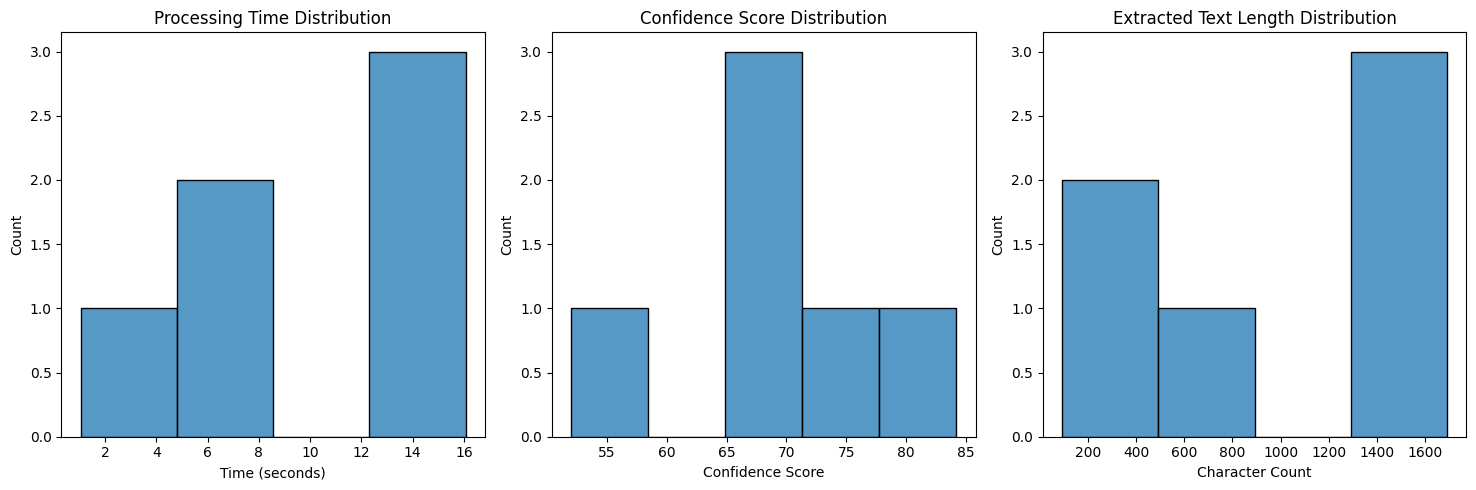


Summary Statistics:
       processing_time  text_length  confidence_score
count         6.000000     6.000000          6.000000
mean          9.677326   970.666667         69.140618
std           6.495286   686.354913         10.525467
min           1.040205    93.000000         52.000000
25%           5.172315   441.250000         67.094900
50%          10.403836  1045.500000         68.773727
75%          15.144409  1544.000000         73.110494
max          16.063006  1690.000000         84.204878


In [16]:
# Create performance visualizations
plt.figure(figsize=(15, 5))

# Processing time distribution
plt.subplot(1, 3, 1)
sns.histplot(data=metrics_df, x='processing_time')
plt.title('Processing Time Distribution')
plt.xlabel('Time (seconds)')

# Confidence score distribution
plt.subplot(1, 3, 2)
sns.histplot(data=metrics_df, x='confidence_score')
plt.title('Confidence Score Distribution')
plt.xlabel('Confidence Score')

# Text length distribution
plt.subplot(1, 3, 3)
sns.histplot(data=metrics_df, x='text_length')
plt.title('Extracted Text Length Distribution')
plt.xlabel('Character Count')

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nSummary Statistics:")
print(metrics_df.describe())
